In [1]:
# importando as bibliotecas
import matplotlib.pyplot as plt

# import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

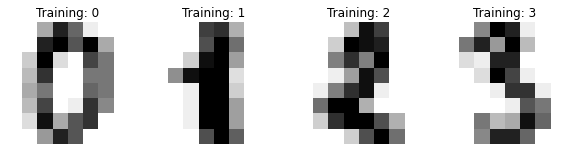

In [2]:
# importa o mnist dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [3]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 80% train and 20% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

In [4]:
 X_train.shape, y_train.shape

((359, 64), (359,))

In [5]:
X_test.shape, y_test.shape

((1438, 64), (1438,))

In [6]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9005563282336578

In [13]:
import numpy as np
from sklearn.model_selection import KFold

X = digits
kf = KFold(n_splits=5)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[2 3 4 5 6] [0 1]
[0 1 4 5 6] [2 3]
[0 1 2 3 5 6] [4]
[0 1 2 3 4 6] [5]
[0 1 2 3 4 5] [6]


In [14]:
# grid search

In [19]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = digits
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [20]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

Confusion matrix:
[[140   0   0   0   0   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 145   0   0   0   0   0   0]
 [  0   0   0   0 147   0   0   0   0   0]
 [  0   0   0   0   0 146   0   0   0   0]
 [  0   0   0   0   0   0 145   0   0   0]
 [  0   0   0   0   0   0   0 144   0   0]
 [  0   0   0   0   0   0   0   0 140   0]
 [  0   0   0   0   0   0   0   0   0 146]]


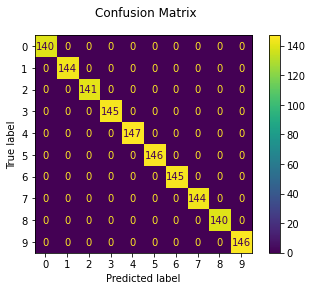

In [21]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()